In [0]:
from pyspark.sql.functions import col, when
from pyspark.sql import functions as F

from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from xgboost.spark import SparkXGBClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
display(
    dbutils.fs.ls("dbfs:/student-groups/Group_4_1/")
)

path name size modificationTime dbfs:/student-groups/Group_4_1/08f51b3e-da58-4e4d-9da0-e331eeb9b245/ 08f51b3e-da58-4e4d-9da0-e331eeb9b245/ 0 1762983225055 dbfs:/student-groups/Group_4_1/3f887a59-7aaf-44bd-ad75-d9ab2e382e22/ 3f887a59-7aaf-44bd-ad75-d9ab2e382e22/ 0 1762983225055 dbfs:/student-groups/Group_4_1/5Y/ 5Y/ 0 1762983225056 dbfs:/student-groups/Group_4_1/86b0469f-b9c6-4218-8869-aaeb39753cac/ 86b0469f-b9c6-4218-8869-aaeb39753cac/ 0 1762983225056 dbfs:/student-groups/Group_4_1/airport_codes.parquet/ airport_codes.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/best_preds_final_test_5Y.parquet/ best_preds_final_test_5Y.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/c505789c-684a-47b9-84e1-24d52ec7cb99/ c505789c-684a-47b9-84e1-24d52ec7cb99/ 0 1762983225056 dbfs:/student-groups/Group_4_1/cv_model/ cv_model/ 0 1762983225056 dbfs:/student-groups/Group_4_1/df_test_scaled.parquet/ df_test_scaled.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/df_test_scaled_checkpoint.parquet/ df_test_scaled_checkpoint.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/df_test_scaled_checkpoint_latest.parquet/ df_test_scaled_checkpoint_latest.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/df_train_scaled.parquet/ df_train_scaled.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/df_train_scaled_checkpoint.parquet/ df_train_scaled_checkpoint.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/df_train_scaled_checkpoint_latest.parquet/ df_train_scaled_checkpoint_latest.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/df_weather.parquet/ df_weather.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/dt_3m_test_predictions.parquet/ dt_3m_test_predictions.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/dt_3m_train_predictions.parquet/ dt_3m_train_predictions.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/dt_prediction_1Y.parquet/ dt_prediction_1Y.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/dt_prediction_5Y.parquet/ dt_prediction_5Y.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/fitted_3m_dt_model/ fitted_3m_dt_model/ 0 1762983225056 dbfs:/student-groups/Group_4_1/fitted_3m_lr_model/ fitted_3m_lr_model/ 0 1762983225056 dbfs:/student-groups/Group_4_1/fitted_lr_model/ fitted_lr_model/ 0 1762983225056 dbfs:/student-groups/Group_4_1/gbt_prediction_5Y.parquet/ gbt_prediction_5Y.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/gbt_prediction_5Y_latest.parquet/ gbt_prediction_5Y_latest.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/graph_features.parquet/ graph_features.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/intermediate/ intermediate/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_3m_test_predictions.parquet/ lr_3m_test_predictions.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_3m_train_predictions.parquet/ lr_3m_train_predictions.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_best_predictions_5Y.parquet/ lr_best_predictions_5Y.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_best_predictions_5Y_latest.parquet/ lr_best_predictions_5Y_latest.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_predictions.parquet/ lr_predictions.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_predictions_1yr.parquet/ lr_predictions_1yr.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_predictions_5yr.parquet/ lr_predictions_5yr.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_predictions_5yr_latest.parquet/ lr_predictions_5yr_latest.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_test_predictions.parquet/ lr_test_predictions.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/lr_train_predictions.parquet/ lr_train_predictions.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/merged_predictions_checkpoint.parquet/ merged_predictions_checkpoint.parquet/ 0 1762983225056 dbfs:/student-groups/Group_4_1/nn_y_pred_1layer_5Y.parquet/ nn_y_pred_1layer_5Y.parquet/ 

In [0]:
out_path = "dbfs:/student-groups/Group_4_1/otpw_clean_3M/"
df_otpw = spark.read.parquet(out_path)

In [0]:
df_otpw.select("DEP_DELAY_GROUP").show()

+---------------+
|DEP_DELAY_GROUP|
+---------------+
|              0|
|             -1|
|             -2|
|             -2|
|             -2|
|              0|
|              0|
|             -1|
|             -2|
|             -1|
|              1|
|             -1|
|              3|
|             -2|
|              0|
|              1|
|             -2|
|              0|
|             -1|
|             -1|
+---------------+
only showing top 20 rows


In [0]:
# Leveraged from Eric
def create_delay_groups(df):
    df_new = df.withColumn(
        "DEP_DELAY_GROUP_CLASSIFIED",
        when(col("DEP_DELAY_GROUP").isin(-2, -1), "early")
        .when(col("DEP_DELAY_GROUP").isin(0), "on_time")
        .otherwise("delayed"),
    )
    return df_new

df_otpw = create_delay_groups(df_otpw)

In [0]:
display(
    df_otpw.select("DEP_DELAY_GROUP", "DEP_DELAY_GROUP_CLASSIFIED").limit(5)
)

DEP_DELAY_GROUP DEP_DELAY_GROUP_CLASSIFIED 0 on_time -1 early -2 early -2 early -2 early

In [0]:
display(df_otpw)

ORIGIN ts_hour HourlyPrecipitation DEP_DELAY_NEW DEP_TIME DEP_DELAY DEP_DELAY_GROUP HourlySkyConditions HourlyWetBulbTemperature HourlyStationPressure TAIL_NUM HourlyWindDirection HourlyRelativeHumidity HourlyDewPointTemperature HourlyWindSpeed HourlyDryBulbTemperature HourlyVisibility LATITUDE DATE STATION two_hours_prior_depart_UTC four_hours_prior_depart_UTC sched_depart_date_time_UTC sched_depart_date_time DEP_TIME_BLK DISTANCE_GROUP DISTANCE CRS_ARR_TIME DAY_OF_MONTH ORIGIN_AIRPORT_ID OP_CARRIER_FL_NUM CRS_DEP_TIME _row_desc NAME ELEVATION DEST_AIRPORT_ID origin_airport_lon origin_airport_lat DAY_OF_WEEK dest_airport_lon FL_DATE QUARTER dest_airport_lat dest_region dest_type LONGITUDE CRS_ELAPSED_TIME dest_iata_code origin_region origin_type origin_iata_code month HourlyPrecipitation_was_missing ts HourlyAltimeterSetting wind_deg_imputed wind_dir_sin wind_dir_cos is_us_holiday is_holiday_window is_summer_peak season DEP_DELAY_GROUP_CLASSIFIED ADK 2015-01-01T23:00:00Z 0.02 8.0 1723 8.0 0 null 42.0 29.62 N764AS 160 76.0 34.0 20.0 41.0 10.0 51.88333 2015-01-01T23:16:00 70454025704 2015-01-02T01:15:00 2015-01-01T23:15:00 2015-01-02T03:15:00 2015-01-01T17:15:00 1700-1759 5 1192.0 2059 1 10165 161 1715 1 ADAK AIRPORT, AK US 5.2 10299 -176.6 51.9 4 -150.0 2015-01-01 1 61.2 US-AK large_airport -176.65 164.0 ANC US-AK medium_airport ADK 1 1 2015-01-01T23:16:00Z 29.99 160.0 0.342 -0.9397 1 1 0 Winter on_time ADK 2015-01-04T23:00:00Z 0.02 0.0 1706 -9.0 -1 null 42.0 29.62 N797AS 120 81.0 34.0 17.0 39.0 6.0 51.88333 2015-01-04T23:16:00 70454025704 2015-01-05T01:15:00 2015-01-04T23:15:00 2015-01-05T03:15:00 2015-01-04T17:15:00 1700-1759 5 1192.0 2059 4 10165 161 1715 1 ADAK AIRPORT, AK US 5.2 10299 -176.6 51.9 7 -150.0 2015-01-04 1 61.2 US-AK large_airport -176.65 164.0 ANC US-AK medium_airport ADK 1 0 2015-01-04T23:16:00Z 29.74 120.0 0.866 -0.5 0 1 0 Winter early ADK 2015-01-08T23:00:00Z 0.015 0.0 1659 -16.0 -2 null 42.0 29.62 N764AS 340 86.0 27.0 5.0 30.0 10.0 51.88333 2015-01-08T23:16:00 70454025704 2015-01-09T01:15:00 2015-01-08T23:15:00 2015-01-09T03:15:00 2015-01-08T17:15:00 1700-1759 5 1192.0 2059 8 10165 161 1715 1 ADAK AIRPORT, AK US 5.2 10299 -176.6 51.9 4 -150.0 2015-01-08 1 61.2 US-AK large_airport -176.65 164.0 ANC US-AK medium_airport ADK 1 1 2015-01-08T23:16:00Z 29.69 340.0 -0.342 0.9397 0 0 0 Winter early ADK 2015-01-11T23:00:00Z 0.015 0.0 1649 -26.0 -2 null 42.0 29.62 N713AS 150 75.0 28.0 8.0 36.0 10.0 51.88333 2015-01-11T23:16:00 70454025704 2015-01-12T01:15:00 2015-01-11T23:15:00 2015-01-12T03:15:00 2015-01-11T17:15:00 1700-1759 5 1192.0 2100 11 10165 161 1715 1 ADAK AIRPORT, AK US 5.2 10299 -176.6 51.9 7 -150.0 2015-01-11 1 61.2 US-AK large_airport -176.65 165.0 ANC US-AK medium_airport ADK 1 1 2015-01-11T23:16:00Z 29.16 150.0 0.5 -0.866 0 0 0 Winter early ADK 2015-01-18T23:00:00Z 0.015 0.0 1640 -35.0 -2 null 42.0 29.62 N799AS 140 75.0 28.0 11.0 36.0 10.0 51.88333 2015-01-18T23:16:00 70454025704 2015-01-19T01:15:00 2015-01-18T23:15:00 2015-01-19T03:15:00 2015-01-18T17:15:00 1700-1759 5 1192.0 2100 18 10165 161 1715 1 ADAK AIRPORT, AK US 5.2 10299 -176.6 51.9 7 -150.0 2015-01-18 1 61.2 US-AK large_airport -176.65 165.0 ANC US-AK medium_airport ADK 1 1 2015-01-18T23:16:00Z 29.41 140.0 0.6428 -0.766 0 1 0 Winter early ADK 2015-01-22T23:00:00Z 0.015 7.0 1722 7.0 0 null 42.0 29.62 N763AS 050 56.0 23.0 22.0 37.0 10.0 51.88333 2015-01-22T23:16:00 70454025704 2015-01-23T01:15:00 2015-01-22T23:15:00 2015-01-23T03:15:00 2015-01-22T17:15:00 1700-1759 5 1192.0 2100 22 10165 161 1715 1 ADAK AIRPORT, AK US 5.2 10299 -176.6 51.9 4 -150.0 2015-01-22 1 61.2 US-AK large_airport -176.65 165.0 ANC US-AK medium_airport ADK 1 1 2015-01-22T23:16:00Z 29.66 50.0 0.766 0.6428 0 1 0 Winter on_time ADK 2015-01-26T00:00:00Z 0.015 0.0 1800 0.0 0 null 42.0 29.62 N767AS 050 70.0 32.0 18.0 41.0 10.0 51.88333 2015-01-26T00:16:00 70454025704 2015-01-26T02:00:00 2015-01-26T00:00:00 2015-01-26T04:00:00 2015-01-25T18:00:00 1800-1859 5 1192.0 2145 25 101

In [0]:
def plot_confusion_matrix(predictions, indexer_model, title: str):
    """
    predictions: DataFrame with columns 'label' and 'prediction'
    indexer_model: fitted StringIndexerModel used for labels
    title: title for the heatmap
    """
    confusion_pd = (
        predictions.groupBy("label", "prediction").count().toPandas()
    )

    cm = (
        confusion_pd
        .pivot(index="label", columns="prediction", values="count")
        .fillna(0)
        .astype(int)
    )

    label_names = indexer_model.labels 

    cm = cm.reindex(index=sorted(cm.index), columns=sorted(cm.columns))

    row_labels = [label_names[int(i)] for i in cm.index]
    col_labels = [label_names[int(j)] for j in cm.columns]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=col_labels,
                yticklabels=row_labels)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [0]:
df_otpw.printSchema()

root
 |-- ORIGIN: string (nullable = true)
 |-- ts_hour: timestamp (nullable = true)
 |-- HourlyPrecipitation: double (nullable = true)
 |-- DEP_DELAY_NEW: string (nullable = true)
 |-- DEP_TIME: string (nullable = true)
 |-- DEP_DELAY: string (nullable = true)
 |-- DEP_DELAY_GROUP: string (nullable = true)
 |-- HourlySkyConditions: string (nullable = true)
 |-- HourlyWetBulbTemperature: double (nullable = true)
 |-- HourlyStationPressure: double (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- HourlyWindDirection: string (nullable = true)
 |-- HourlyRelativeHumidity: double (nullable = true)
 |-- HourlyDewPointTemperature: double (nullable = true)
 |-- HourlyWindSpeed: double (nullable = true)
 |-- HourlyDryBulbTemperature: double (nullable = true)
 |-- HourlyVisibility: double (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- STATION: string (nullable = true)
 |-- two_hours_prior_depart_UTC: string (nullable = true)
 |-- 

In [0]:
def prep_for_rf(df, label_col="DEP_DELAY_GROUP_CLASSIFIED"):
    banned = {label_col, "DEP_DELAY_GROUP"}

    # 1) clear any stale ML metadata
    df = df.select([F.col(c).alias(c, metadata={}) for c in df.columns])

    # 2) normalize strings, then cast ALL non-label strings to double
    for c, t in df.dtypes:
        if t == "string" and c not in banned:
            df = df.withColumn(c, F.trim(F.col(c)))
            df = df.withColumn(c, F.when(F.col(c) == "", None).otherwise(F.col(c)))
            df = df.withColumn(c, F.col(c).cast("double"))  # non-numeric → null

    # 3) fill NaNs in numerics (so assembler/RF won’t choke)
    numeric_cols = [c for c, t in df.dtypes if c not in banned and t in {"double","float","int","bigint"}]
    if numeric_cols:
        df = df.fillna(0.0, subset=numeric_cols)
    else:
        raise ValueError("Still no numeric columns after casting — check schema/label name.")

    return df

In [0]:
def train_test_split(df):
    # Train / test split
    train_df, test_df = df.randomSplit([0.8, 0.2], seed=1234)
    return train_df, test_df

def get_feature_cols(df, label_col="DEP_DELAY_GROUP_CLASSIFIED"):
    # Numeric feature columns only (excluding label and raw group)
    feature_cols = [
        c for c, t in df.dtypes
        if t in ("int", "bigint", "double", "float")
        and c not in [label_col, "DEP_DELAY_GROUP"]
    ]
    return feature_cols

def drop_columns(df, columns_to_drop):
    return df.drop(*columns_to_drop)

In [0]:
df_clean = prep_for_rf(df_otpw)

cols_to_remove = [
    "DEP_DELAY_NEW", "DEP_TIME", "DEP_DELAY", "DEP_DELAY_GROUP"
]
df_filtered = drop_columns(df_clean, cols_to_remove)

feature_cols = get_feature_cols(df_filtered)
train_df, test_df = train_test_split(df_filtered)

Random forest

In [0]:
def train_random_forest(df_train, df_test, feature_cols, label_col="DEP_DELAY_GROUP_CLASSIFIED"):
    """
    Train a Random Forest classifier on the given dataframe.
    Returns (model, predictions).
    """
    # Index string label -> numeric label
    label_indexer = StringIndexer(
        inputCol=label_col,
        outputCol="label",
        handleInvalid="keep",
    )

    # Assemble features -> vector
    assembler = VectorAssembler(
        inputCols=feature_cols,
        outputCol="features",
        handleInvalid="keep",
    )

    # Random Forest classifier
    rf = RandomForestClassifier(
        featuresCol="features",
        labelCol="label",
        predictionCol="prediction",
        probabilityCol="probability",
        rawPredictionCol="rawPrediction",
        numTrees=200,
        maxDepth=10,
        seed=42,
    )

    rf_pipeline = Pipeline(stages=[label_indexer, assembler, rf])

    # Fit model
    rf_model = rf_pipeline.fit(df_train)

    # Predict on test set
    pred_test = rf_model.transform(df_test)

    # Metrics
    evaluator_acc = MulticlassClassificationEvaluator(
        labelCol="label",
        predictionCol="prediction",
        metricName="accuracy",
    )
    evaluator_f1 = MulticlassClassificationEvaluator(
        labelCol="label",
        predictionCol="prediction",
        metricName="f1",
    )

    test_accuracy = evaluator_acc.evaluate(pred_test)
    test_f1 = evaluator_f1.evaluate(pred_test)

    print("=== Random Forest (no CV) ===")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Test F1-score: {test_f1:.4f}")

    # Confusion matrix
    indexer_model = rf_model.stages[0]
    plot_confusion_matrix(
        pred_test,
        indexer_model=indexer_model,
        title="Confusion Matrix - Random Forest (Baseline)",
    )

    return rf_model, pred_test

=== Random Forest (no CV) ===
Test accuracy: 0.5667
Test F1-score: 0.4440


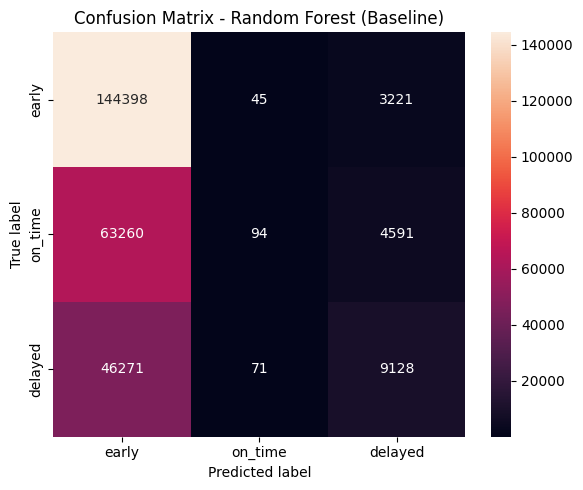

In [0]:
model, preds = train_random_forest(train_df, test_df, feature_cols)

XG Boost

In [0]:
def train_xgboost(df_train, df_test, feature_cols, label_col="DEP_DELAY_GROUP_CLASSIFIED"):
    """
    Train an XGBoost classifier using xgboost.spark.SparkXGBClassifier
    on the given dataframe. Returns (model, predictions).
    """
    label_indexer = StringIndexer(
        inputCol=label_col,
        outputCol="label",
        handleInvalid="keep",
    )

    assembler = VectorAssembler(
        inputCols=feature_cols,
        outputCol="features",
        handleInvalid="keep",
    )

    # XGBoost classifier
    xgb = SparkXGBClassifier(
        features_col="features",
        label_col="label",
        max_depth=6,
        n_estimators=100,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0, # Ridge regular
        reg_alpha=0.0
    )

    xgb_pipeline = Pipeline(stages=[label_indexer, assembler, xgb])

    xgb_model = xgb_pipeline.fit(train_df)

    pred_test = xgb_model.transform(test_df)

    evaluator_acc = MulticlassClassificationEvaluator(
        labelCol="label",
        predictionCol="prediction",
        metricName="accuracy",
    )
    evaluator_f1 = MulticlassClassificationEvaluator(
        labelCol="label",
        predictionCol="prediction",
        metricName="f1",
    )

    test_accuracy = evaluator_acc.evaluate(pred_test)
    test_f1 = evaluator_f1.evaluate(pred_test)

    print("=== XGBoost (SparkXGBClassifier) ===")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Test F1-score: {test_f1:.4f}")

    indexer_model = xgb_model.stages[0]
    plot_confusion_matrix(
        pred_test,
        indexer_model=indexer_model,
        title="Confusion Matrix - XGBoost (Baseline)",
    )

    return xgb_model, pred_test


2025-11-12 21:54:21,313 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'multi:softprob', 'colsample_bytree': 0.8, 'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 6, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'subsample': 0.8, 'num_class': 3, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
2025-11-12 21:55:45,900 INFO XGBoost-PySpark: _fit Finished xgboost training!


=== XGBoost (SparkXGBClassifier) ===
Test accuracy: 0.5847
Test F1-score: 0.5011


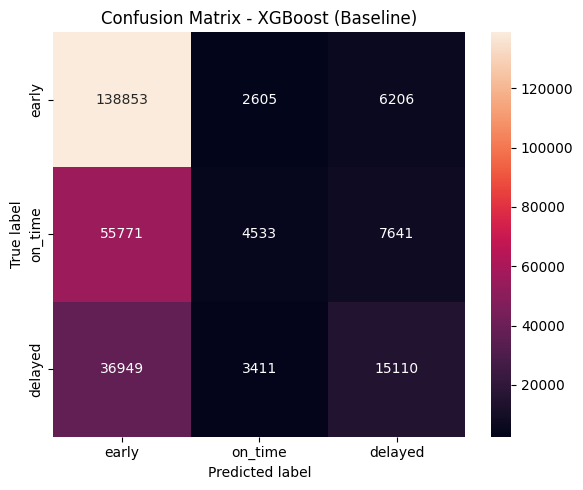

In [0]:
xgb_model, xgb_pred = train_xgboost(train_df, test_df, feature_cols)

Both models are extremely overfit to the training data, which is expected on these gradient boost and ensemble models

For hourlySkyConditions
- separate observation to a new column?
- How to have this column encoding?
